In [58]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [50]:
prices = pd.read_csv('data/log_prices.csv', index_col='date')
prices = prices.dropna()
prices.head()

,brn,cl,ho,xrb
date,,,,
20150105,0.010676,0.025528,-0.023495,0.032481
20150112,-0.039646,-0.081290,-0.008362,-0.018356
20150119,0.082589,0.041151,0.022561,0.087349
20150126,0.117570,0.118920,0.091463,0.075879
20150202,0.056883,0.012610,0.069970,0.039044


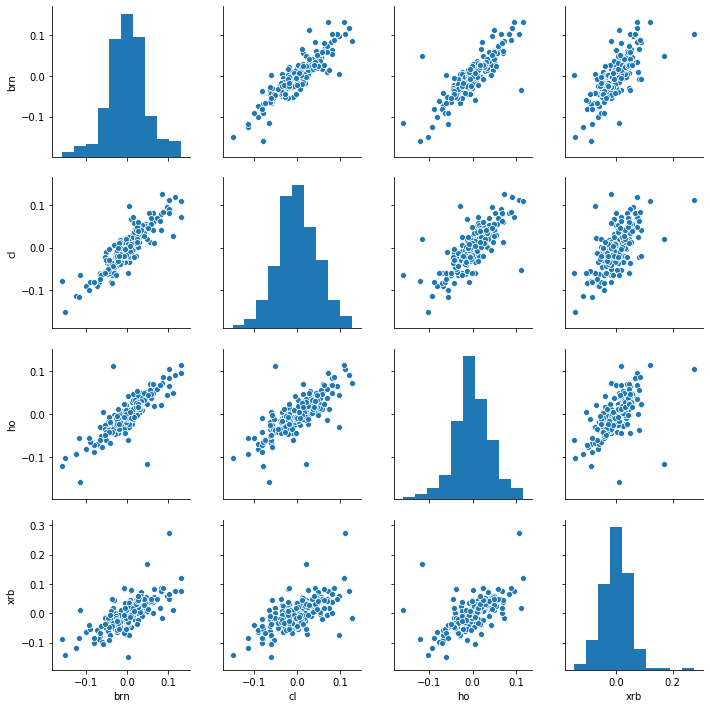

In [51]:
sb.pairplot(prices)
plt.show()

In [145]:
# Correlation matrix
prices.corr()

,brn,cl,ho,xrb
brn,1.000000,0.890081,0.846233,0.719229
cl,0.890081,1.000000,0.778133,0.658417
ho,0.846233,0.778133,1.000000,0.620990
xrb,0.719229,0.658417,0.620990,1.000000


Fit parameters of marginal distributions. Suppose there are t-Student distributions.

In [146]:
param = {'brn': stats.t.fit(prices.brn), 
         'cl': stats.t.fit(prices.cl), 
         'ho': stats.t.fit(prices.ho), 
         'xrb': stats.t.fit(prices.xrb)}
param

{'brn': (4.717481643722772, 0.001395993688828745, 0.036571742170715),
 'cl': (35.15545988613356, 0.0003650380447012075, 0.045773879438890136),
 'ho': (5.5727271899375275, 0.00027987385271763623, 0.03382973903441035),
 'xrb': (5.853887016954179, -0.0002726353416228246, 0.04008764330453997)}

Generating of sample

In [166]:
norm_sample = np.random.multivariate_normal([0, 0, 0, 0], prices.cov(), size=1000)
uniform_sample = stats.norm.cdf(norm_sample)
df, loc, scale = param['brn']
brn_sample = stats.t.ppf(uniform_sample.T[0], df, loc, scale)
df, loc, scale = param['cl']
cl_sample = stats.t.ppf(uniform_sample.T[1], df, loc, scale)
df, loc, scale = param['ho']
ho_sample = stats.t.ppf(uniform_sample.T[2], df, loc, scale)
df, loc, scale = param['xrb']
xrb_sample = stats.t.ppf(uniform_sample.T[3], df, loc, scale)
gen_prices = pd.DataFrame({'brn': brn_sample, 
                           'cl': cl_sample, 
                           'ho': ho_sample, 
                           'xrb': xrb_sample})
gen_prices.head()

,brn,cl,ho,xrb
0,0.000420,-0.000277,-0.000001,-0.002091
1,0.001903,0.000821,0.000157,-0.000340
2,0.004095,0.003690,0.001908,0.001706
3,0.006154,0.004560,0.004318,0.001854
4,0.001771,-0.002253,-0.000260,0.000357


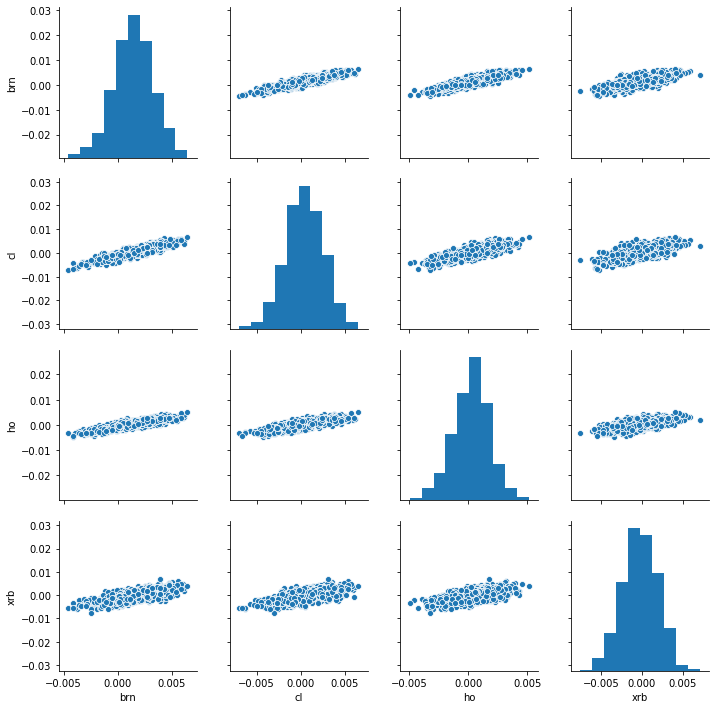

In [170]:
sb.pairplot(gen_prices)
plt.show()